In [1]:
# import subprocess

# result = subprocess.run(
#     ["python", "miniscope_sanity_check.py"],
#     capture_output=True,  # Captures stdout and stderr
#     text=True
# )
# print("STDOUT:")
# print(result.stdout)
# print("STDERR:")
# print(result.stderr)


bash: line 2: activate: No such file or directory


Error loading data: No .nc files found in the specified path.


CalledProcessError: Command 'b'# Activate the miniscope environment (replace \'miniscope_env\' with your environment name)\nsource activate minian_ana\n\npython - <<\'EOF\'\nimport os\nimport sys\nsys.path.append(os.path.abspath(\'../../\'))\nfrom utlis.Ca_tools.roi_spike_vis_utlis import load_minian_data, calculate_dff, overlay_all_roi_edges\n\n# Replace with the appropriate miniscope path you wish to test:\nminian_path = \'/data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/your_minian_path/\'\nmini_timestamps = os.path.join(minian_path, \'timeStamps.csv\')\n\ntry:\n    data, ts = load_minian_data(minian_path, mini_timestamps)\n    print("Data loaded successfully for:", minian_path)\nexcept Exception as e:\n    print("Error loading data:", e)\n    exit(1)\n\ntry:\n    dF_F = calculate_dff(data)\n    print("dF/F calculated.")\nexcept Exception as e:\n    print("Error calculating dF/F:", e)\n\ntry:\n    max_proj = data[\'max_proj\'].values\n    overlay_all_roi_edges(data, max_proj)\n    print("ROI overlay complete.")\nexcept Exception as e:\n    print("Error overlaying ROI edges:", e)\n\ninput("Inspect the ROI overlay and then press Enter to finish...")\nEOF\n'' returned non-zero exit status 1.

In [ ]:
#!/usr/bin/env python3
import os
import sys
import json
import csv

# Adjust sys.path so that ROI spike visualization functions can be imported.
sys.path.append(os.path.abspath('../../'))
from utlis.Ca_tools.roi_spike_vis_utlis import load_minian_data, calculate_dff, overlay_all_roi_edges

def normalize_path(p):
    """
    Normalize a file path by stripping whitespace, removing quotes, lowercasing,
    and using os.path.normpath to standardize directory separators.
    """
    if not p:
        return ""
    return os.path.normpath(p.strip().strip('"')).lower()

def run_minian_sanity_check(minian_path):
    """
    Run the ROI/spike visualization sanity check for a given miniscope path.
    """
    print(f"\nProcessing miniscope path:\n  {minian_path}")
    # Construct the path to the timestamps CSV file.
    mini_timestamps = os.path.join(minian_path, 'timeStamps.csv')
    
    # Load the miniscope data.
    try:
        data, ts = load_minian_data(minian_path, mini_timestamps)
        print("  Data loaded successfully.")
    except Exception as e:
        print(f"  Error loading minian data from {minian_path}: {e}")
        return
    
    # Retrieve the maximum projection and overlay ROI edges.
    try:
        max_proj = data['max_proj'].values
        overlay_all_roi_edges(data, max_proj)
        print("  ROI edges overlaid successfully.")
    except Exception as e:
        print(f"  Error overlaying ROI edges for {minian_path}: {e}")
        return

def main():
    # Path to the JSON mapping file.
    json_file = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_to_rec_mapping.json"
    
    if not os.path.exists(json_file):
        print(f"JSON file not found: {json_file}")
        return
    
    
    with open(json_file, "r") as f:
        mapping_data = json.load(f)
    
    # Load processed miniscope paths from the CSV file.
    csv_file = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_sanity.csv"
    processed_paths = set()
    
    if os.path.exists(csv_file):
        with open(csv_file, newline="") as f:
            # Use skipinitialspace=True to handle spaces after commas.
            reader = csv.DictReader(f, skipinitialspace=True)
            for row in reader:
                csv_path = row.get("rec_path", "")
                norm_csv_path = normalize_path(csv_path)
                if norm_csv_path:
                    processed_paths.add(norm_csv_path)
        print("Processed miniscope paths from CSV:")
        for pr in processed_paths:
            print(f"  {pr}")
    else:
        print(f"CSV file not found: {csv_file}")
    
    # Loop through each miniscope path in the JSON file.
    for mini_path, mapping in mapping_data.items():
        # Normalize the JSON key (miniscope path).
        norm_mini_path = normalize_path(mini_path)
        time_diff = mapping.get("time_diff")
        rec_path_field = mapping.get("rec_path")
        valid = mapping.get("valid")
        
        # Debug print: show the normalized miniscope path.
        print(f"\nChecking miniscope path: {mini_path}")
        print(f"  Normalized key: {norm_mini_path}")
        
        # Skip processing if the miniscope path (the JSON key) is already in the CSV file.
        if norm_mini_path in processed_paths:
            print(f"Skipping {mini_path} because it is already processed (found in mini_sanity.csv).")
            continue
        
        # Process only if rec_path is not None and time_diff criteria are met.
        if rec_path_field is not None and time_diff < 10:
            run_minian_sanity_check(mini_path)
        else:
            print(f"Skipping {mini_path} (valid: {valid}, time_diff: {time_diff}, rec_path: {rec_path_field})")
            
if __name__ == "__main__":
    main()


Processed miniscope paths from CSV:
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/20241002-pmc-r2/customentvalhere/2024_10_25/16_27_28/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/20240916-v1-r1/customentvalhere/2024_10_14/14_54_12/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/20240717-pmc-r1/customentvalhere/2024_10_24/12_32_37/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/20241002-pmc-r2/customentvalhere/2024_10_25/17_09_14/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/20240916-v1-r2/customentvalhere/2024_10_14/16_03_58/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/202401015-pmc-r2/customentvalhere/2024_11_07/13_04_45/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/20240819-v1-r1/customentvalhere/2024_10_31/11_50_32/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/oct3v1mini_sorted/20240916-v1-r1/customentvalhere/2024_10_14/16_54_16/my_v4_miniscope
  /data/big_rim/rsync_dcc_sum/o

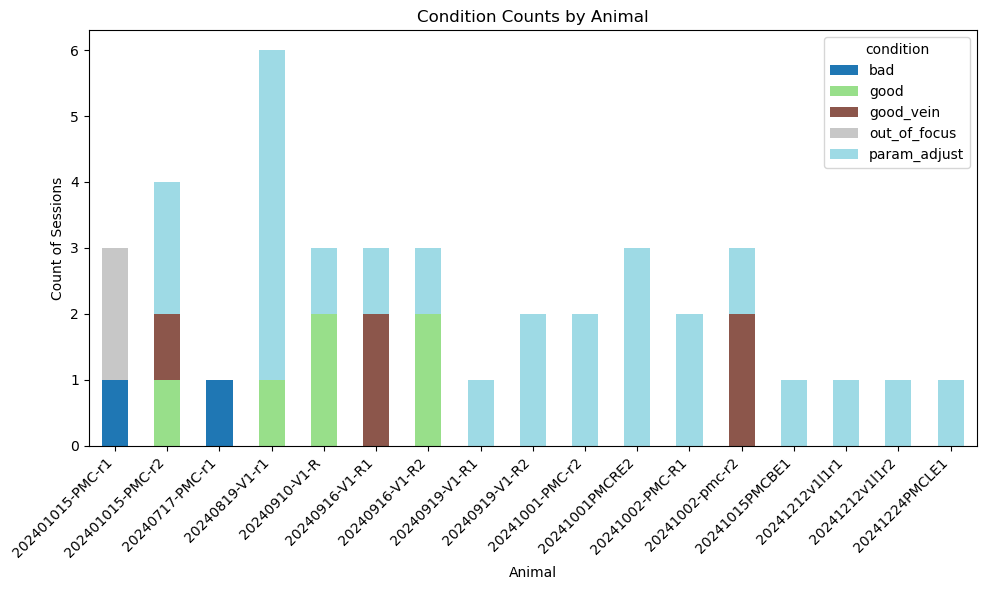

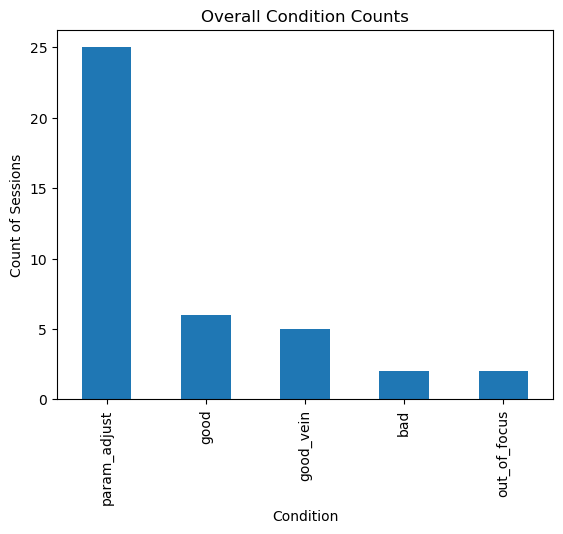

In [1]:
# understandning current analysis quality:

import pandas as pd
import matplotlib.pyplot as plt
import re

# Path to your CSV file
csv_path = "/home/lq53/mir_repos/BBOP/random_tests/25mar_minibbop_integration/mini_sanity_240324_mannual.csv"
# "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_sanity.csv"

# 1. Read CSV
#    Make sure your CSV has the column headers exactly "condition,rec_path",
#    and there's no extra whitespace or line issues.
df = pd.read_csv(csv_path, header=0)

# 2. Extract the "animal" from rec_path
#    The animal name is after 'Oct3V1mini_sorted/' and before '/customEntValHere/'
pattern = r"Oct3V1mini_sorted/([^/]+)/customEntValHere/.*"

# Create a new column "animal"
df["animal"] = df["rec_path"].str.extract(pattern)

# 3. Group by animal and condition, count the number of rows
summary = df.groupby(["animal", "condition"]).size().unstack(fill_value=0)

# 4. Make a stacked bar chart
ax = summary.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 6),
    colormap="tab20"
)
ax.set_title("Condition Counts by Animal")
ax.set_xlabel("Animal")
ax.set_ylabel("Count of Sessions")

# Optionally rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5. (Optional) If you also want a simpler bar chart of condition counts across *all* animals:
df["condition"].value_counts().plot(kind="bar")
plt.title("Overall Condition Counts")
plt.xlabel("Condition")
plt.ylabel("Count of Sessions")
plt.show()


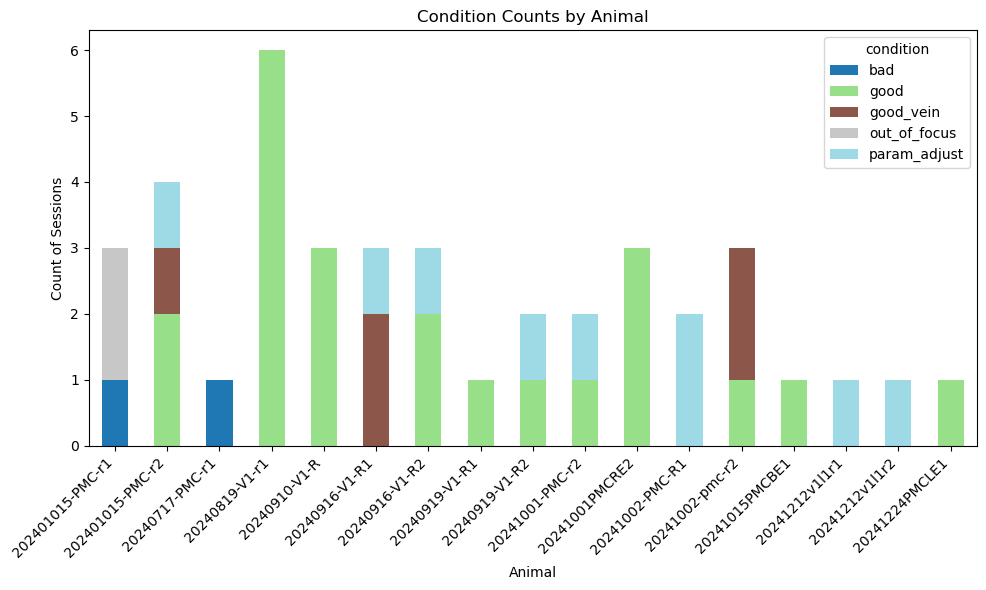

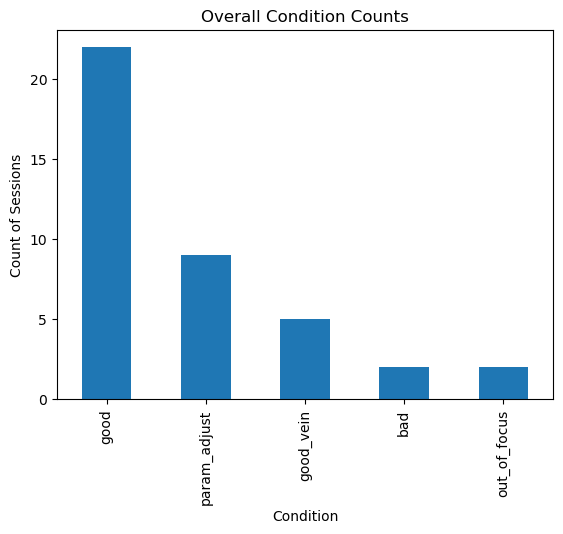

In [1]:
# understandning current analysis quality:

import pandas as pd
import matplotlib.pyplot as plt
import re

# Path to your CSV file
csv_path = "/home/lq53/mir_repos/BBOP/random_tests/25mar_minibbop_integration/mini_sanity_240331_updated_nc_select.csv"
# "/home/lq53/mir_repos/BBOP/random_tests/25mar_minibbop_integration/mini_sanity_240324_mannual.csv"
# "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_sanity.csv"

# 1. Read CSV
#    Make sure your CSV has the column headers exactly "condition,rec_path",
#    and there's no extra whitespace or line issues.
df = pd.read_csv(csv_path, header=0)

# 2. Extract the "animal" from rec_path
#    The animal name is after 'Oct3V1mini_sorted/' and before '/customEntValHere/'
pattern = r"Oct3V1mini_sorted/([^/]+)/customEntValHere/.*"

# Create a new column "animal"
df["animal"] = df["rec_path"].str.extract(pattern)

# 3. Group by animal and condition, count the number of rows
summary = df.groupby(["animal", "condition"]).size().unstack(fill_value=0)

# 4. Make a stacked bar chart
ax = summary.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 6),
    colormap="tab20"
)
ax.set_title("Condition Counts by Animal")
ax.set_xlabel("Animal")
ax.set_ylabel("Count of Sessions")

# Optionally rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5. (Optional) If you also want a simpler bar chart of condition counts across *all* animals:
df["condition"].value_counts().plot(kind="bar")
plt.title("Overall Condition Counts")
plt.xlabel("Condition")
plt.ylabel("Count of Sessions")
plt.show()


In [ ]:
# need to be tested. 

# import os
# import sys
# import json
# import glob
# import pandas as pd

# # Add project root so that the functions can be imported
# sys.path.append(os.path.abspath('../..'))
# from utlis.sync_utlis.mini_dannce_sync import (
#     sync_videos,
#     align_miniscope_to_sixcam,
#     load_aligneddannce_and_process_ca_data
# )

# def get_rec_path_for_mini(raw_mini_path, mapping):
#     """
#     Given a raw mini_path and a mapping dictionary, return its corresponding rec_path.
    
#     Parameters:
#         raw_mini_path (str): The mini_path value from the CSV.
#         mapping (dict): A dictionary mapping raw mini paths to metadata (including rec_path).
        
#     Returns:
#         str: The rec_path corresponding to raw_mini_path.
    
#     Raises:
#         KeyError: If raw_mini_path is not found in the mapping.
#     """
#     if raw_mini_path not in mapping:
#         raise KeyError(f"Key '{raw_mini_path}' not found in mapping.")
#     return mapping[raw_mini_path].get("rec_path")

# def extract_mini_directory(raw_mini_path):
#     """
#     Given the raw mini_path, if it ends with 'My_V4_Miniscope',
#     remove that folder and return the parent directory (with a trailing slash).
#     Otherwise, ensure the path ends with a slash.
#     """
#     norm_path = os.path.normpath(raw_mini_path)
#     if os.path.basename(norm_path) == "My_V4_Miniscope":
#         cleaned = os.path.dirname(norm_path)
#     else:
#         cleaned = norm_path
#     if not cleaned.endswith(os.sep):
#         cleaned += os.sep
#     return cleaned

# def extract_rec_directory(raw_rec_path):
#     """
#     Given a full rec_path (which includes the filename, e.g.
#     '/.../20241015pmcr2_16_53/DANNCE/predict00/save_data_AVG.mat'),
#     return only the parent directory (e.g.
#     '/.../20241015pmcr2_16_53/'), ensuring a trailing slash.
#     """
#     # Go up three levels from the file
#     parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(raw_rec_path)))
#     if not parent_dir.endswith(os.sep):
#         parent_dir += os.sep
#     return parent_dir

# def process_good_minis():
#     # Define file paths
#     csv_path = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_sanity.csv"
#     json_path = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_to_rec_mapping.json"
#     nc_csv_path = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_nc_mapping.csv"  # New CSV mapping
    
#     # Read the original CSV; note that the column 'rec_path' holds the raw mini_path.
#     df = pd.read_csv(csv_path)
#     # Filter rows to only those with condition 'good' or 'good_vein'
#     df_filtered = df[df['condition'].isin(["good", "good_vein"])]
    
#     # Load the JSON mapping from mini_path to rec_path
#     with open(json_path, 'r') as f:
#         mini_to_rec = json.load(f)
    
#     # Load the new CSV mapping (if it exists) to map a raw mini_path to the desired .nc file name.
#     if os.path.exists(nc_csv_path):
#         nc_mapping_df = pd.read_csv(nc_csv_path)
#         # Build a dictionary: key = rec_path from CSV, value = desired .nc filename.
#         nc_mapping_dict = dict(zip(nc_mapping_df["rec_path"], nc_mapping_df["nc_file"]))
#     else:
#         nc_mapping_dict = {}
    
#     # Process each filtered mini_path
#     for idx, row in df_filtered.iterrows():
#         raw_mini_path = row["rec_path"]  # Use the raw value for matching.
#         try:
#             raw_rec_path = get_rec_path_for_mini(raw_mini_path, mini_to_rec)
#         except KeyError as e:
#             print(e)
#             continue

#         print("raw_rec_path:", raw_rec_path)
        
#         if raw_rec_path:
#             # Clean the paths before feeding into downstream functions.
#             mini_path = extract_mini_directory(raw_mini_path)
#             rec_path = extract_rec_directory(raw_rec_path)
            
#             print(f"Using matched rec_path: {rec_path} for mini_path: {mini_path}")
            
#             # Step 1: Dannce alignment
#             resultsss = sync_videos(
#                 rec_path,
#                 mini_path,
#                 start_frame=0,
#                 end_frame=200,
#                 threshold_mini=15,
#                 threshold_sixcam=3
#             )
            
#             # Wrap the alignment call in try/except to catch TypeError and IndexError.
#             try:
#                 align_miniscope_to_sixcam(resultsss, mini_path, rec_path)
#             except (TypeError, IndexError) as e:
#                 print(f"Error during align_miniscope_to_sixcam for mini_path: {mini_path}. Skipping this mini. Error: {e}")
#                 continue
            
#             # Step 2: Check for .nc files in the miniscope folder and determine which one to use.
#             # Here, we assume that the raw_mini_path points to the folder containing the .nc files.
#             nc_folder = raw_mini_path
#             nc_files = glob.glob(os.path.join(nc_folder, "*.nc"))
#             selected_nc_file = None
            
#             if len(nc_files) == 0:
#                 print(f"No .nc files found in {nc_folder}.")
#             elif len(nc_files) == 1:
#                 selected_nc_file = nc_files[0]
#                 print(f"Found single .nc file: {selected_nc_file}")
#             else:
#                 # More than one .nc file exists. Try to get the specific file from the mapping.
#                 if raw_mini_path in nc_mapping_dict:
#                     selected_filename = nc_mapping_dict[raw_mini_path]
#                     potential_path = os.path.join(nc_folder, selected_filename)
#                     if os.path.exists(potential_path):
#                         selected_nc_file = potential_path
#                         print(f"Selected .nc file from mapping: {selected_nc_file}")
#                     else:
#                         print(f"Mapped .nc file '{selected_filename}' not found in {nc_folder}. Using first found file: {nc_files[0]}")
#                         selected_nc_file = nc_files[0]
#                 else:
#                     print(f"Multiple .nc files found in {nc_folder} but no mapping entry exists. Using first found file: {nc_files[0]}")
#                     selected_nc_file = nc_files[0]
            
#             # Step 3: Load alignment and process calcium data.
#             # Here we assume that load_aligneddannce_and_process_ca_data has been updated to accept an optional 'nc_file' parameter.
#             if selected_nc_file:
#                 df_merged_with_dF_F = load_aligneddannce_and_process_ca_data(rec_path, mini_path, nc_file=selected_nc_file)
#             else:
#                 # Fallback: call without the nc_file parameter if none was selected.
#                 df_merged_with_dF_F = load_aligneddannce_and_process_ca_data(rec_path, mini_path)
            
#             # (Optional) Further processing on df_merged_with_dF_F can be done here.
#         else:
#             print(f"No matching rec_path found for mini_path: {raw_mini_path}")

# if __name__ == "__main__":
#     process_good_minis()


raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R1/customEntValHere/2024_10_14/16_54_16/
Camera index with data_frame starting at 1: 5


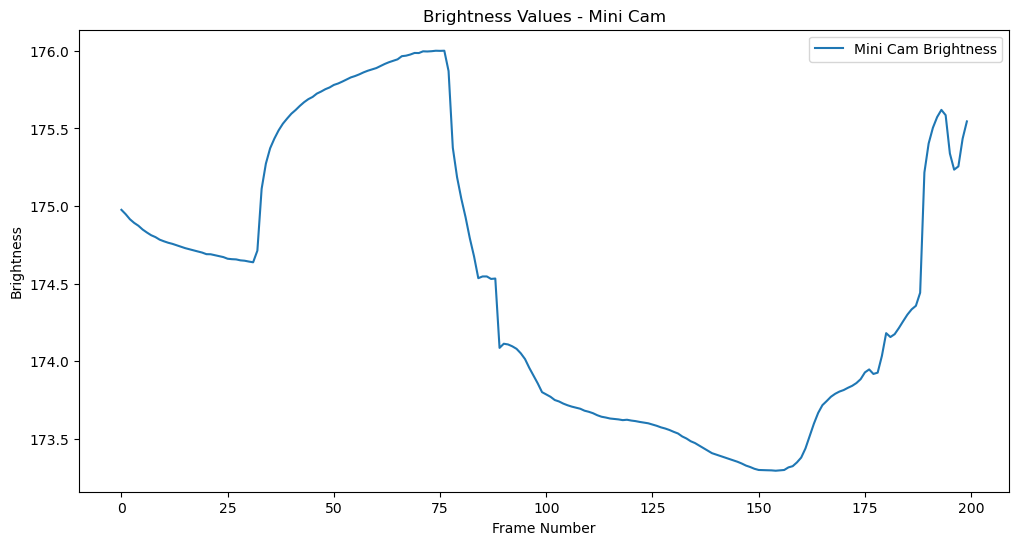

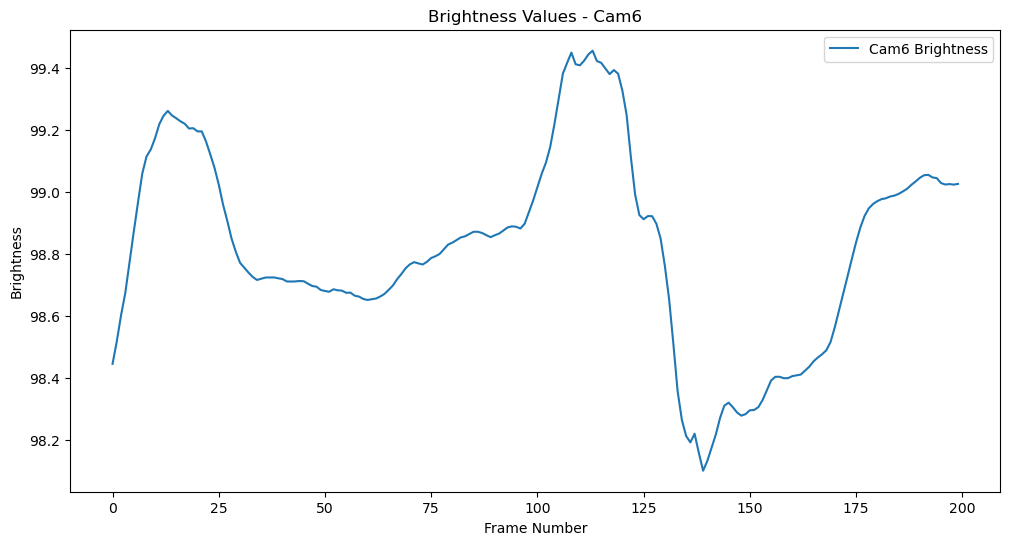

Error during align_miniscope_to_sixcam for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R1/customEntValHere/2024_10_14/16_54_16/. Skipping this mini. Error: list indices must be integers or slices, not NoneType
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R2/customEntValHere/2024_10_14/14_23_28/
Camera index with data_frame starting at 1: 0


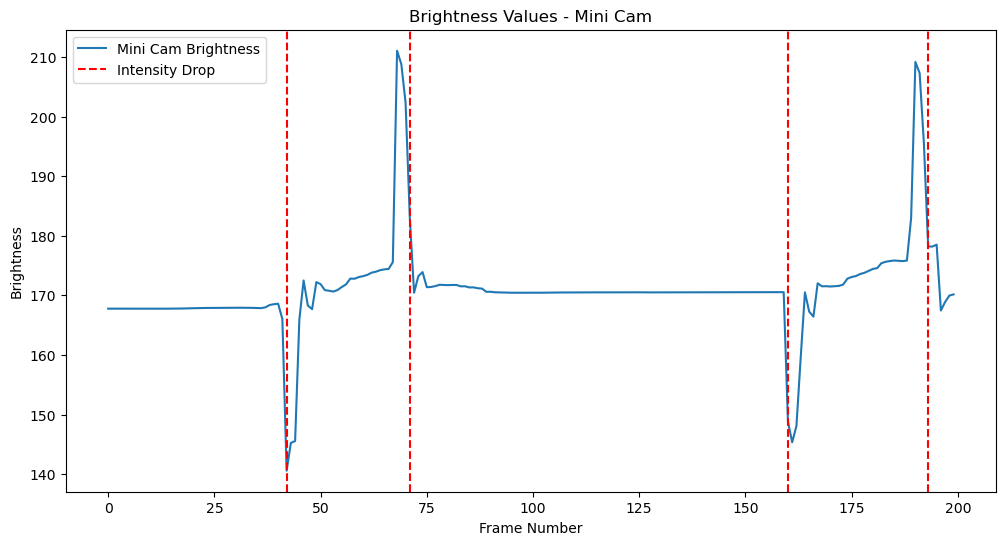

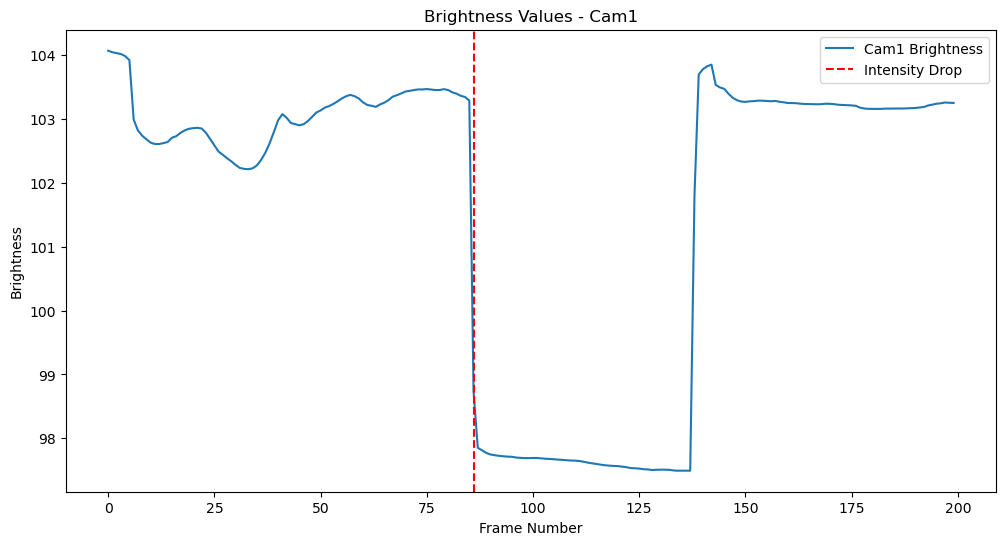

offset:  -81.10720799985575
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8941, 66)
aligned_pred_3d.shape: (8941, 22, 3)
aligned_com.shape: (8941, 3)
Data loaded successfully!
Calcium data shape: (30, 8955)
Timestamps shape: (8955,)
Interpolated Ca data shape: (30, 8941)
ΔF/F interpolated shape: (30, 8941)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R2/customEntValHere/2024_10_14/16_

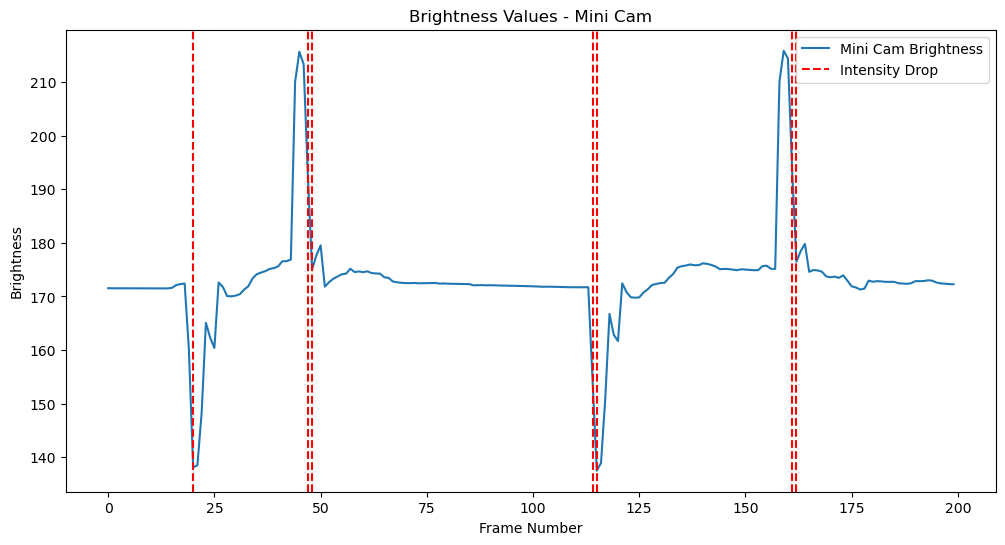

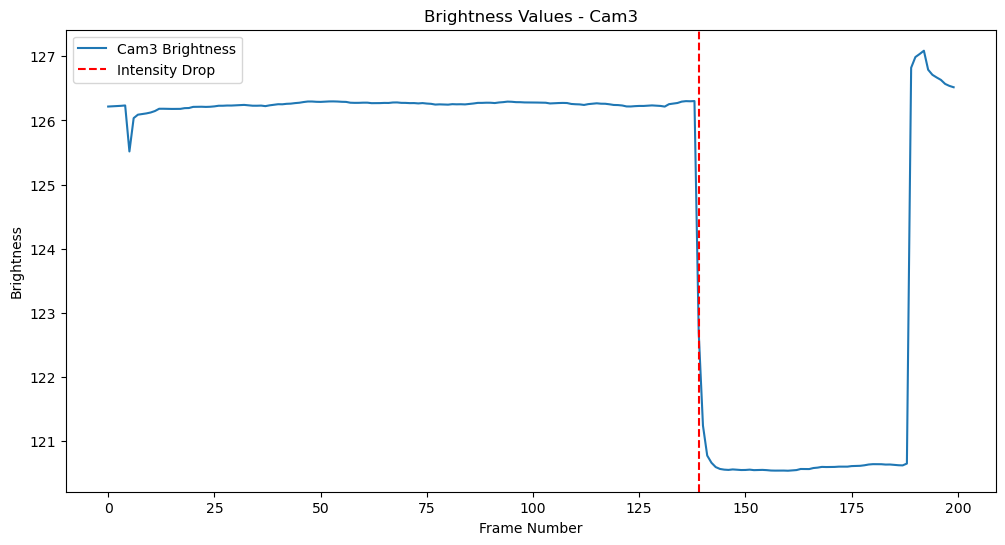

offset:  -3341.64404799996
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8909, 66)
aligned_pred_3d.shape: (8909, 22, 3)
aligned_com.shape: (8909, 3)
Data loaded successfully!
Calcium data shape: (43, 8955)
Timestamps shape: (8955,)
Interpolated Ca data shape: (43, 8909)
ΔF/F interpolated shape: (43, 8909)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/202401015-PMC-r2/customEntValHere/2024_11_06/

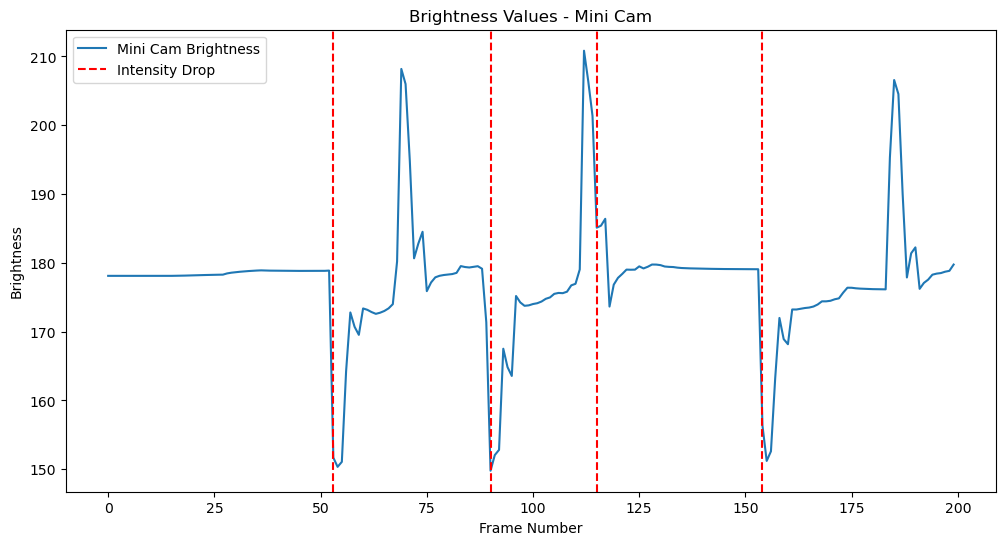

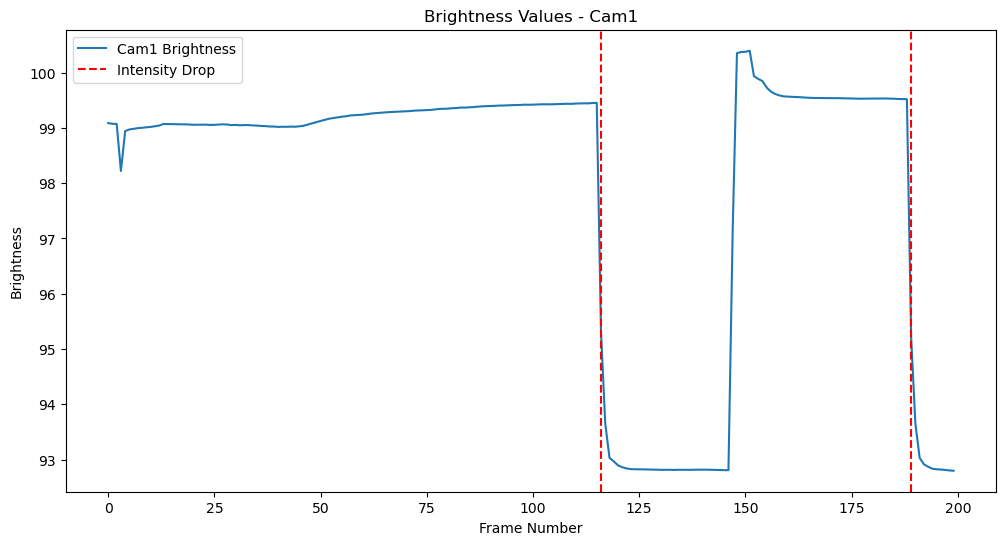

offset:  -334.6203199999909
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8930, 66)
aligned_pred_3d.shape: (8930, 22, 3)
aligned_com.shape: (8930, 3)
Data loaded successfully!
Calcium data shape: (35, 8947)
Timestamps shape: (8947,)
Interpolated Ca data shape: (35, 8930)
ΔF/F interpolated shape: (35, 8930)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_0

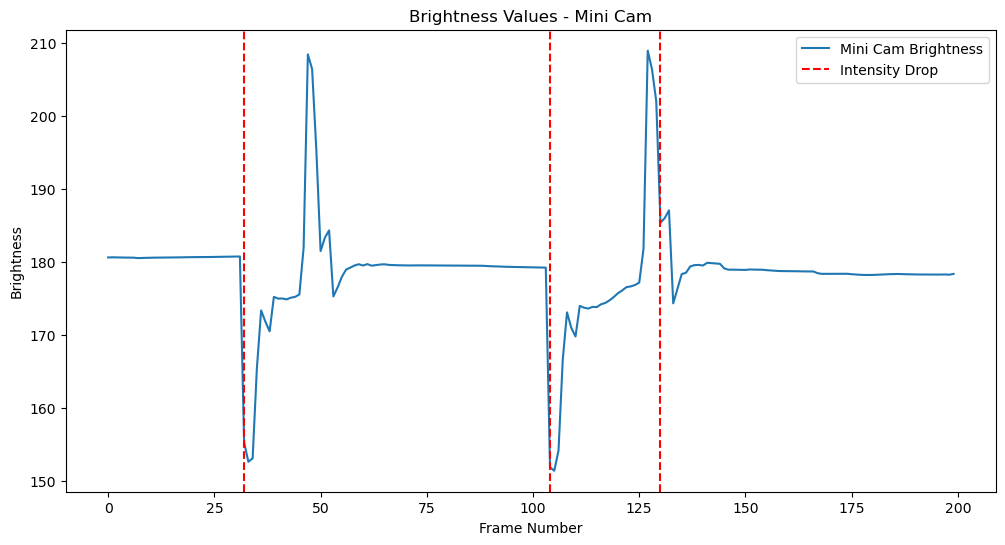

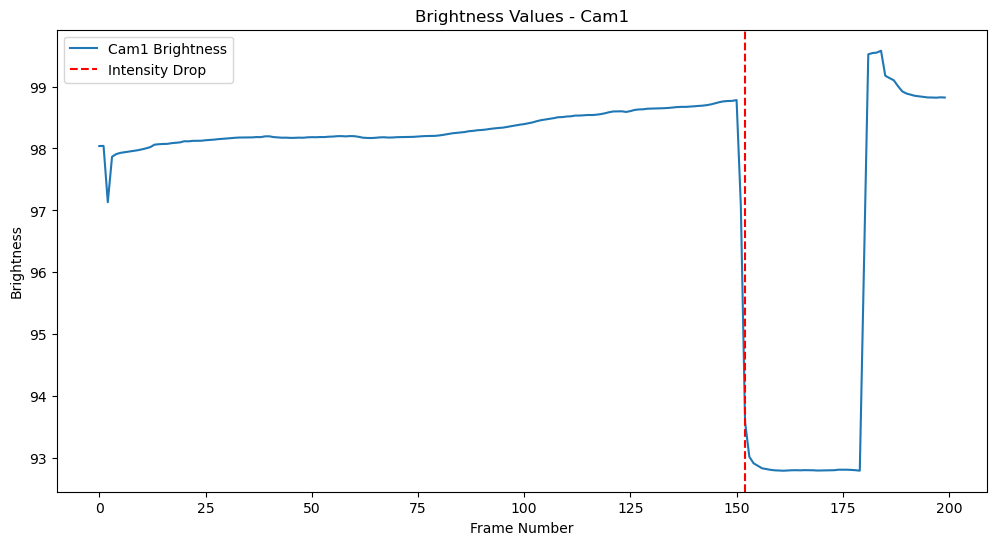

offset:  -2970.2444719998093
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8913, 66)
aligned_pred_3d.shape: (8913, 22, 3)
aligned_com.shape: (8913, 3)
Data loaded successfully!
Calcium data shape: (57, 8951)
Timestamps shape: (8951,)
Interpolated Ca data shape: (57, 8913)
ΔF/F interpolated shape: (57, 8913)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_1

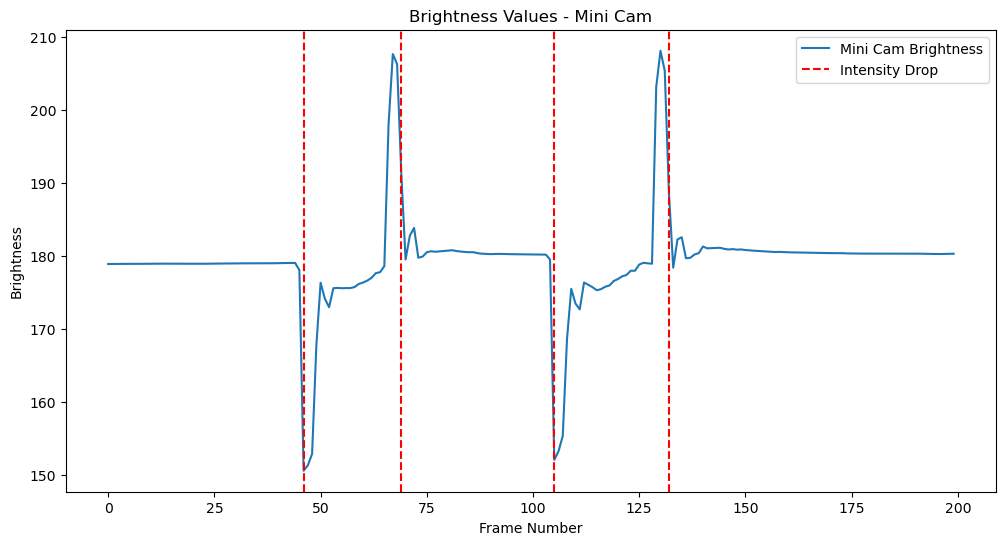

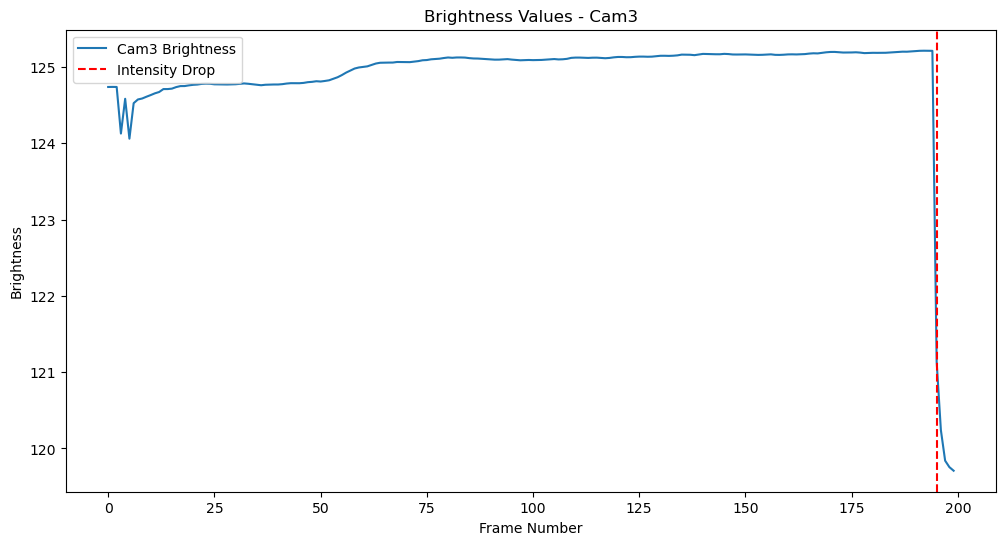

offset:  -3486.280663999987
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8907, 66)
aligned_pred_3d.shape: (8907, 22, 3)
aligned_com.shape: (8907, 3)
Data loaded successfully!
Calcium data shape: (20, 8955)
Timestamps shape: (8955,)
Interpolated Ca data shape: (20, 8907)
ΔF/F interpolated shape: (20, 8907)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R1/customEntValHere/2024_10_14

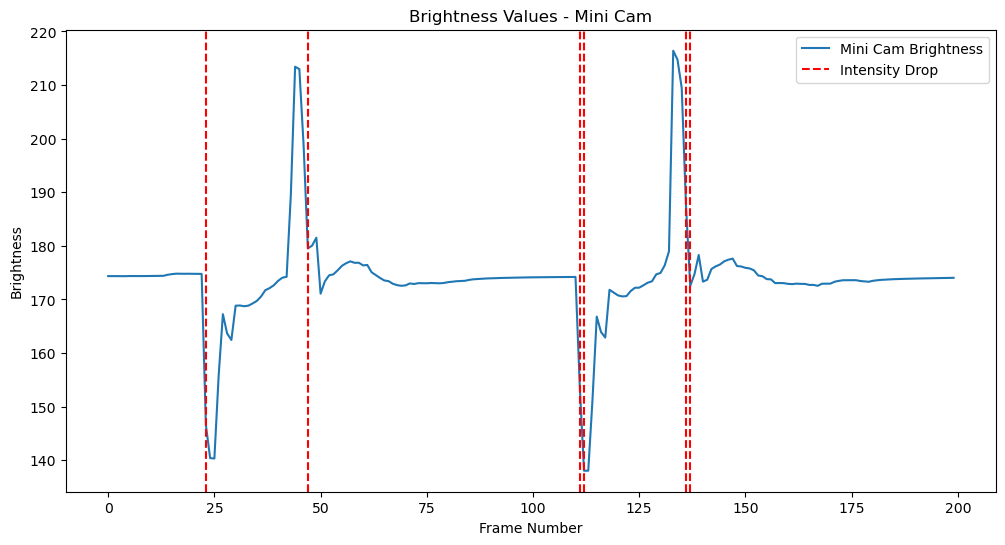

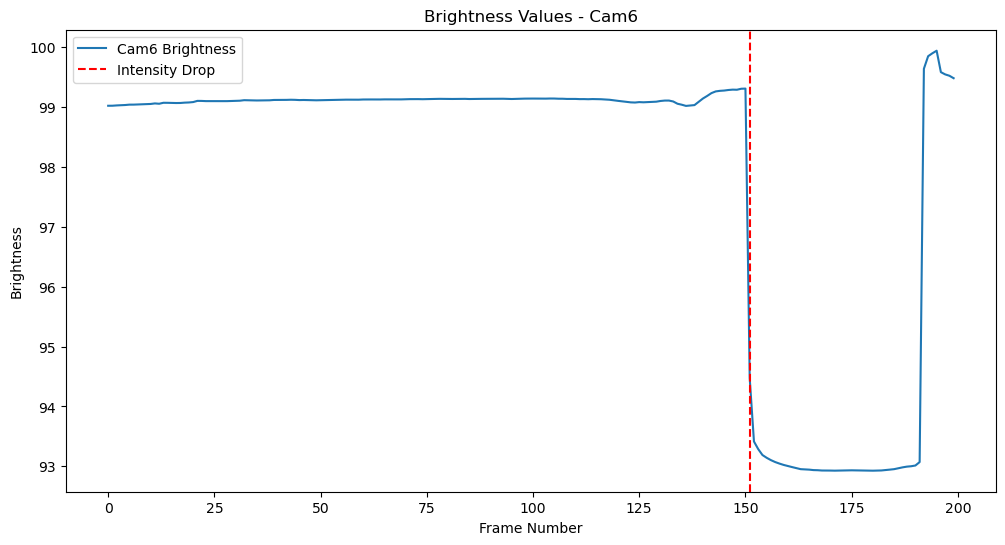

offset:  -3514.843031999775
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8907, 66)
aligned_pred_3d.shape: (8907, 22, 3)
aligned_com.shape: (8907, 3)
Data loaded successfully!
Calcium data shape: (79, 8953)
Timestamps shape: (8953,)
Interpolated Ca data shape: (79, 8907)
ΔF/F interpolated shape: (79, 8907)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/

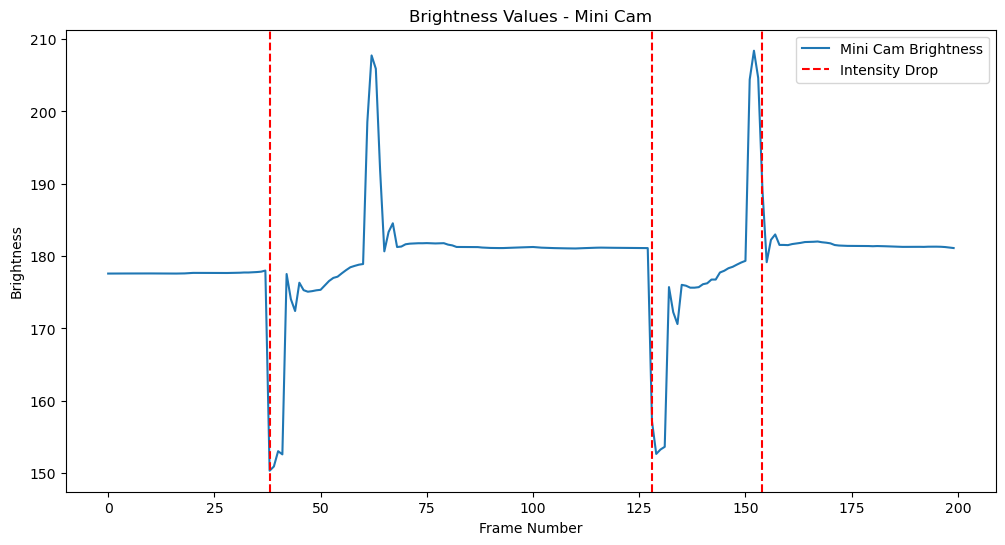

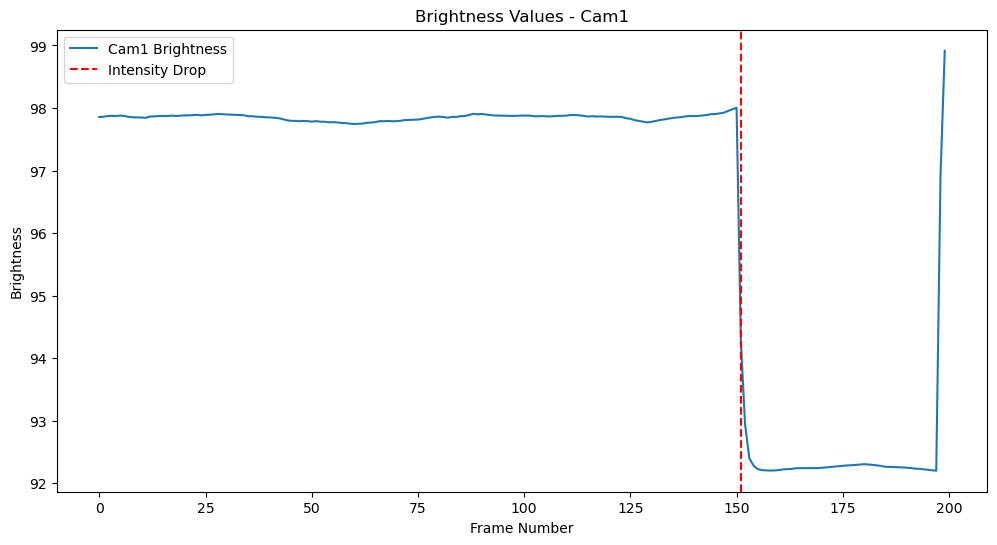

offset:  -2509.8932560000085
pred current shape(27000, 3, 22)
preds transposed to (27000, 22, 3)
Aligned data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/MIR_Aligned/aligned_predictions.h5
aligned_pred_3d_flat.shape: (8917, 66)
aligned_pred_3d.shape: (8917, 22, 3)
aligned_com.shape: (8917, 3)
Data loaded successfully!
Calcium data shape: (96, 8954)
Timestamps shape: (8954,)
Interpolated Ca data shape: (96, 8917)
ΔF/F interpolated shape: (96, 8917)
DataFrame with Ca and ΔF/F signals merged:
Updated DataFrame with Ca and ΔF/F data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5
raw_rec_path /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/DANNCE/predict00/save_data_AVG.mat
Using matched rec_path: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/ for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_

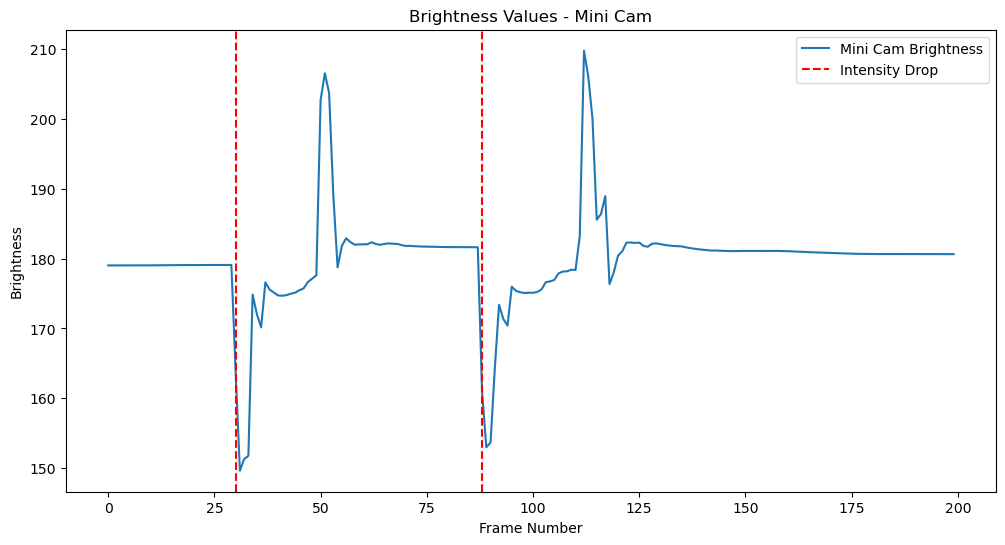

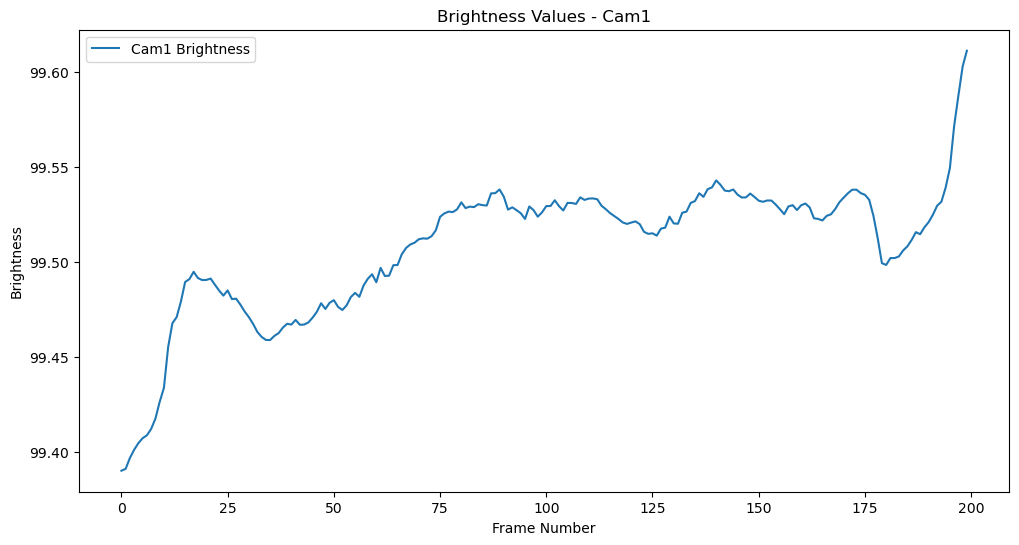

offset:  [[   1967.          1933.648872    1900.297608 ... -908391.72092
  -908425.06376  -908458.4156  ]]
Error during align_miniscope_to_sixcam for mini_path: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/17_09_14/. Skipping this mini. Error: index 1 is out of bounds for axis 0 with size 1


In [ ]:

#below is amazingly working well, but in the case wehn only one .nc filie exist. to keep the information that are generated from long processing, and in case i may need them later, i decided instead of deleting them, i would just spcify the file. but that is not a funciton of below. 
# import os
# import sys
# import json
# import pandas as pd

# # Add project root so that the functions can be imported
# sys.path.append(os.path.abspath('../..'))
# from utlis.sync_utlis.mini_dannce_sync import sync_videos, align_miniscope_to_sixcam, load_aligneddannce_and_process_ca_data

# def get_rec_path_for_mini(raw_mini_path, mapping):
#     """
#     Given a raw mini_path and a mapping dictionary, return its corresponding rec_path.
    
#     Parameters:
#         raw_mini_path (str): The mini_path value from the CSV.
#         mapping (dict): A dictionary mapping raw mini paths to metadata (including rec_path).
        
#     Returns:
#         str: The rec_path corresponding to raw_mini_path.
    
#     Raises:
#         KeyError: If raw_mini_path is not found in the mapping.
#     """
#     if raw_mini_path not in mapping:
#         raise KeyError(f"Key '{raw_mini_path}' not found in mapping.")
#     return mapping[raw_mini_path].get("rec_path")

# def extract_mini_directory(raw_mini_path):
#     """
#     Given the raw mini_path, if it ends with 'My_V4_Miniscope',
#     remove that folder and return the parent directory (with a trailing slash).
#     Otherwise, ensure the path ends with a slash.
#     """
#     norm_path = os.path.normpath(raw_mini_path)
#     if os.path.basename(norm_path) == "My_V4_Miniscope":
#         cleaned = os.path.dirname(norm_path)
#     else:
#         cleaned = norm_path
#     if not cleaned.endswith(os.sep):
#         cleaned += os.sep
#     return cleaned

# def extract_rec_directory(raw_rec_path):
#     """
#     Given a full rec_path (which includes the filename, e.g.
#     '/.../20241015pmcr2_16_53/DANNCE/predict00/save_data_AVG.mat'),
#     return only the parent directory (e.g.
#     '/.../20241015pmcr2_16_53/'), ensuring a trailing slash.
#     """
#     # Go up three levels from the file
#     parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(raw_rec_path)))
#     if not parent_dir.endswith(os.sep):
#         parent_dir += os.sep
#     return parent_dir

# def process_good_minis():
#     # Define file paths
#     csv_path = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_sanity.csv"
#     json_path = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_to_rec_mapping.json"
    
#     # Read CSV; note that the column 'rec_path' actually holds the raw mini_path.
#     df = pd.read_csv(csv_path)
    
#     # Filter rows to only those with condition 'good' or 'good_vein'
#     df_filtered = df[df['condition'].isin(["good", "good_vein"])]
    
#     # Load the JSON mapping from mini_path to rec_path
#     with open(json_path, 'r') as f:
#         mini_to_rec = json.load(f)
    
#     # Process each filtered mini_path
#     for idx, row in df_filtered.iterrows():
#         raw_mini_path = row["rec_path"]  # Use the raw value for matching.
#         try:
#             raw_rec_path = get_rec_path_for_mini(raw_mini_path, mini_to_rec)
#         except KeyError as e:
#             print(e)
#             continue

#         print("raw_rec_path", raw_rec_path)
        
#         if raw_rec_path:
#             # Clean the paths before feeding into downstream functions.
#             mini_path = extract_mini_directory(raw_mini_path)
#             rec_path = extract_rec_directory(raw_rec_path)
            
#             print(f"Using matched rec_path: {rec_path} for mini_path: {mini_path}")
            
#             # Step 1: Dannce alignment
#             resultsss = sync_videos(
#                 rec_path,
#                 mini_path,
#                 start_frame=0,
#                 end_frame=200,
#                 threshold_mini=15,
#                 threshold_sixcam=3
#             )
            
#             # Wrap the alignment call in try/except to catch TypeError and IndexError.
#             try:
#                 align_miniscope_to_sixcam(resultsss, mini_path, rec_path)
#             except (TypeError, IndexError) as e:
#                 print(f"Error during align_miniscope_to_sixcam for mini_path: {mini_path}. Skipping this mini. Error: {e}")
#                 continue
            
#             # Step 2: Load alignment and process calcium data
#             df_merged_with_dF_F = load_aligneddannce_and_process_ca_data(rec_path, mini_path)
            
#             # (Optional) Further processing on df_merged_with_dF_F can be done here.
#         else:
#             print(f"No matching rec_path found for mini_path: {raw_mini_path}")

# if __name__ == "__main__":
#     process_good_minis()
